<H2>課題1：仮説検定を実装する</H2>
<p>ここでは、いわゆる古典的統計手法と言われる仮説検定をPythonで実装してみましょう。</p>
<p>レッスン6までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み</H2>

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

%matplotlib inline

<H2>2. 1標本における解析</H2>
<p>本課題では乱数を発生させることでデータを作成し、それについて解析してみましょう。</p>
<p>乱数のパラメータを変更すると結果がどう変化するのか、試してみるとより理解が深まるかと思います。</p>

In [4]:
# 任意の平均値・標準偏差をもつ正規乱数を任意のサイズで作成し、"data1"に格納
np.random.seed(0)

norm_dist = stats.norm(loc=50, scale=10)
data1 = norm_dist.rvs(size = 1000)

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([19.53856945, 25.34406762, 31.14956579, 36.95506396, 42.76056213,
        48.5660603 , 54.37155846, 60.17705663, 65.9825548 , 71.78805297,
        77.59355114]),
 <a list of 10 Patch objects>)

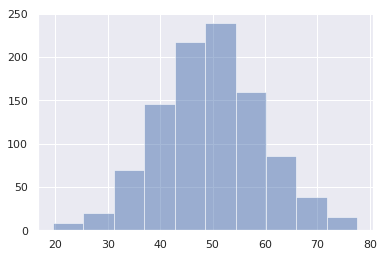

In [7]:
#　data1のヒストグラムを作成
plt.hist(data1, alpha=0.5, color='b')

In [8]:
# 母平均の点推定を計算し、結果を表示
mu = sp.mean(data1)
mu

49.54743292509804

In [9]:
# 95%信頼区間の推定を行い、上側信頼限界と下側信頼限界の値を表示

# 自由度を計算
df = len(data1) -1

# 標準誤差を計算
sigma = sp.std(data1, ddof=1)
se = sigma/sp.sqrt(len(data1))

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(48.93462612126609, 50.160239728929994)

In [10]:
# 任意のt値を設定し、片側検定した結果を表示
t_value = 0.05
alpha = stats.t.cdf(t_value, df=df)

p_value = 1 - alpha
p_value

0.4800661915327197

In [11]:
# 任意のt値を設定し、両側検定した結果を表示
p_value * 2

0.9601323830654394

<H2>3. 2標本における解析</H2>
<p>標本をもう1つ増やし、先ほどの標本と差があるのか否かについて検討してみましょう。</p>

In [12]:
# 任意の平均値・標準偏差をもつ正規乱数を任意のサイズで作成し、"data2"に格納
np.random.seed(0)

norm_dist = stats.norm(loc=55, scale=15)
data2 = norm_dist.rvs(size=1000)

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([ 9.30785418, 18.01610143, 26.72434868, 35.43259594, 44.14084319,
        52.84909044, 61.5573377 , 70.26558495, 78.9738322 , 87.68207946,
        96.39032671]),
 <a list of 10 Patch objects>)

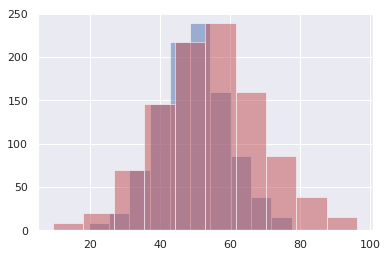

In [17]:
# data1とdata2をヒストグラムにてプロット
plt.hist(data1, alpha=0.5, color='b')
plt.hist(data2, alpha=0.5, color='r')

In [18]:
# data1, data2それぞれの値を使って「対応のあるt検定」で計算し、結果を表示
stats.ttest_rel(data1, data2)

Ttest_relResult(statistic=-30.572969097530162, pvalue=1.9513209938669554e-145)

In [19]:
# data1, data2それぞれの値を使って「対応のないt検定」で計算し、結果を表示
stats.ttest_ind(data1, data2, equal_var=False)

Ttest_indResult(statistic=-8.479415978793915, pvalue=4.757066914305031e-17)

<h2>4. ここまでの仮説検定の結果を解釈して下記に記載してください</h2>

data1はdata2と「 優位に異なる 」（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）